In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# 加载数据
file_path_Mix_dataset_One_Hot = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot.csv"
file_path_Mix_dataset_One_Hot_LDA = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot_LDA.csv"
file_path_Mix_dataset_One_Hot_PCA = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot_PCA.csv"
file_path_Mix_dataset_One_Hot_MI = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot_MI.csv"
file_path_Mix_dataset_One_Hot_Pearson = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot_Pearson.csv"

file_path_Mix_dataset_Label_Encoding = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_Label_Encoding.csv"
file_path_Mix_dataset_Label_Encoding_LDA = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_Label_Encoding_LDA.csv"
file_path_Mix_dataset_Label_Encoding_PCA = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_Label_Encoding_PCA.csv"
file_path_Mix_dataset_Label_Encoding_MI = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_Label_Encoding_MI.csv"
file_path_Mix_dataset_Label_Encoding_Pearson = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_Label_Encoding_Pearson.csv"
# 加载数据
final_data = pd.read_csv(file_path_Mix_dataset_Label_Encoding_MI, header=0)
final_data.head()

,srv_rerror_rate,protocol_type,duration,dst_host_srv_rerror_rate,rerror_rate,dst_host_rerror_rate,srv_diff_host_rate,srv_count,dst_host_count,dst_host_same_src_port_rate,...,dst_host_srv_count,count,dst_host_diff_srv_rate,same_srv_rate,flag,diff_srv_rate,dst_bytes,service,src_bytes,label
0,-0.405192,-0.132017,-0.112481,-0.406815,-0.40646,-0.267151,-0.376389,-0.348310,-0.344349,0.077981,...,-0.849240,-0.696611,-0.278736,0.749108,0.733734,-0.348092,-0.004614,-0.719829,-0.007346,0
1,-0.405192,2.235956,-0.112481,-0.406815,-0.40646,-0.422074,-0.376389,-0.361578,0.721338,2.378421,...,-1.065006,-0.602401,2.657874,-1.358363,0.733734,0.422462,-0.004614,0.753338,-0.007409,0
2,-0.405192,-0.132017,-0.112481,-0.406815,-0.40646,-0.422074,-0.376389,-0.295238,0.721338,-0.472829,...,-0.840250,0.339700,-0.175697,-1.427085,-0.707737,0.011499,-0.004614,1.060247,-0.007436,1
3,-0.405192,-0.132017,-0.112481,-0.376989,-0.40646,-0.422074,-0.376389,-0.308506,-1.562277,-0.375627,...,1.218511,-0.670918,-0.433294,0.749108,0.733734,-0.348092,-0.002413,-0.474301,-0.007394,0
4,-0.405192,-0.132017,-0.112481,-0.406815,-0.40646,-0.422074,-0.028744,0.049729,0.721338,-0.472829,...,1.218511,-0.456804,-0.433294,0.749108,0.733734,-0.348092,-0.004501,-0.474301,-0.007400,0


In [3]:
X = final_data.iloc[:, :-1].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded, original)
y = final_data.iloc[:, -1]   # 标签

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [5]:
# 统计训练集中每个类别的数量
train_label_counts = y_train.value_counts()
# 统计测试集中每个类别的数量
test_label_counts = y_test.value_counts()
# 打印结果
print("训练集中各类别的数量：\n", train_label_counts)
print("\n测试集中各类别的数量：\n", test_label_counts)

训练集中各类别的数量：
 label
0    57790
1    40040
2    10558
3     2910
4       89
Name: count, dtype: int64

测试集中各类别的数量：
 label
0    19264
1    13347
2     3519
3      970
4       30
Name: count, dtype: int64


In [6]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# 初始化 SMOTE 对象
smote = SMOTE()

# 对训练集进行重采样
X_train, y_train  = smote.fit_resample(X_train, y_train)

# 打印重采样后的数据规模
print(f'重采样后的数据规模')
print(f'X_train_resampled shape: {X_train.shape}')
print(f'y_train_resampled shape: {y_train.shape}')
print(Counter(y_train))

重采样后的数据规模
X_train_resampled shape: (288950, 26)
y_train_resampled shape: (288950,)
Counter({1: 57790, 0: 57790, 3: 57790, 2: 57790, 4: 57790})


In [7]:
# from collections import Counter
# from imblearn.over_sampling import ADASYN
# 
# # 初始化 ADASYN 对象
# adasyn = ADASYN()
# 
# # 对训练集进行重采样
# X_train, y_train = adasyn.fit_resample(X_train, y_train)
# 
# # 打印重采样后的数据规模
# print(f'重采样后的数据规模')
# print(f'X_train_resampled shape: {X_train.shape}')
# print(f'y_train_resampled shape: {y_train.shape}')
# print(Counter(y_train))

In [8]:
from sklearn.ensemble import RandomForestClassifier
import time

# 使用默认参数
clf = RandomForestClassifier(random_state=0)

# 训练模型
start = time.time()
clf.fit(X_train, y_train)
print('训练用时：{0}'.format(time.time() - start))

训练用时：49.663132667541504


In [9]:
import pickle
from os import path
from sklearn.svm import SVC

pkl_filename = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Model\NSL-KDD\AUG\RF\Mix_dataset_Label_Encoding_MI_SMOTE.pkl"
# 检查文件是否已存在
if not path.isfile(pkl_filename):
    # 保存模型到磁盘
    with open(pkl_filename, 'wb') as file:
        pickle.dump(clf, file)
    print("Saved model to disk")

# 从磁盘加载模型
with open(pkl_filename, 'rb') as file:
    loaded_model = pickle.load(file)
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [10]:
Model = loaded_model

In [11]:
# 使用测试集进行预测
y_pred = Model.predict(X_test)

accuracy = np.mean(y_pred == y_test)
accuracy = f"{accuracy * 100:.2f}%"
print(f'accuracy is {accuracy}')

accuracy is 99.49%


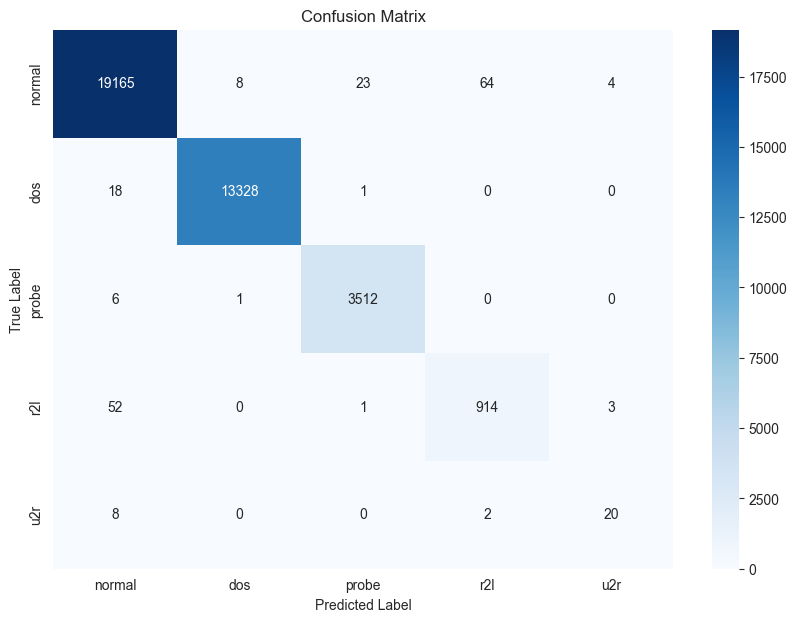

In [12]:
from sklearn.metrics import confusion_matrix
# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
# 获取类别名称（假设 label_mapping 是之前保存的映射）
label_mapping = ['normal', 'dos', 'probe', 'r2l', 'u2r']
class_names = label_mapping
# 可视化混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

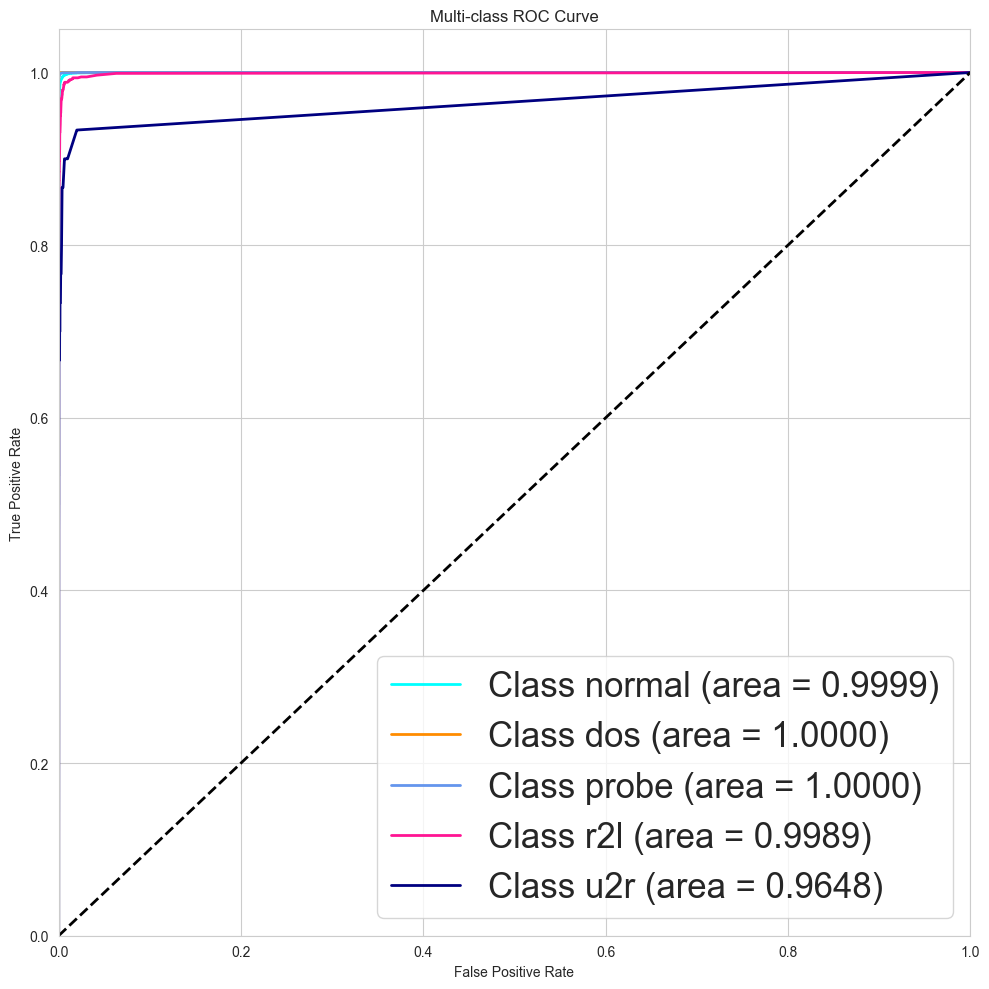

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize

# 假设 clf 是已经训练好的分类器
# 获取测试集上的决策函数得分
y_score = Model.predict_proba(X_test)

# 为每个类别进行one-hot编码
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

# 计算ROC曲线和ROC面积
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制所有类别的ROC曲线
plt.figure(figsize=(10, 10))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink', 'navy'])

label_mapping = ['normal', 'dos', 'probe', 'r2l', 'u2r']  # 类别名称

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (area = {1:0.4f})'.format(label_mapping[i], roc_auc[i]))

    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')

# 将图例放到图像外面并放大字体
plt.legend(loc='lower right', fontsize='25')

# 调整布局以防止图例被裁剪
plt.tight_layout()

plt.show()

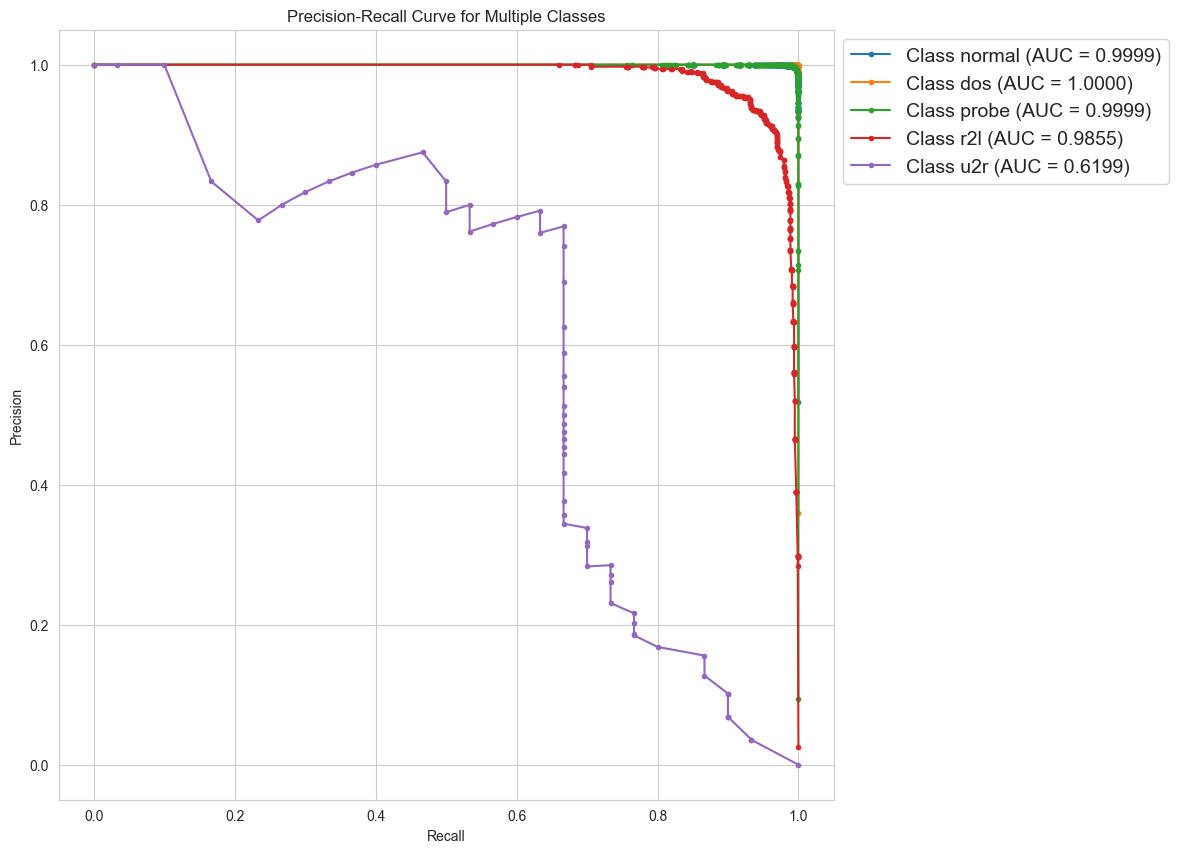

In [14]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# 将真实标签转换为 one-hot 编码
y_true_bin = label_binarize(y_test, classes=np.unique(y_train))

# 确定类别数和类别名称
n_classes = y_true_bin.shape[1]
class_names = label_mapping  # 确保类别名称正确

# 创建一个新的图表
plt.figure(figsize=(10, 10))

# 为每个类别绘制PR曲线，并记录AUC值
auc_scores = []
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_score[:, i])
    auc_score = auc(recall, precision)
    auc_scores.append(auc_score)
    plt.plot(recall, precision, marker='.', label='Class {} (AUC = {:.4f})'.format(class_names[i], auc_score))

# 设置图表的其他属性
plt.title('Precision-Recall Curve for Multiple Classes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(fontsize=14)
# 将图例放置在图像的右侧外部
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
# 展示图表
plt.show()

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# 计算精度、召回率和F1分数
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
def fdr_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    false_discoveries = np.sum(cm, axis=0) - np.diag(cm)  # FP per class
    total_predictions = np.sum(cm, axis=0)  # Total predicted per class
    with np.errstate(divide='ignore', invalid='ignore'):
        fdrs = np.true_divide(false_discoveries, total_predictions)
        fdrs[np.isnan(fdrs)] = 0  # Replace NaN with 0
    return np.mean(fdrs)  # Average FDR over all classes
# 使用这个函数计算FDR
fdr = fdr_score(y_test, y_pred)

# 定义MCC分数计算函数
def mcc_score(y_true, y_pred, class_label):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[class_label, class_label]
    tn = np.sum(cm) - np.sum(cm[class_label, :]) - np.sum(cm[:, class_label]) + tp
    fp = np.sum(cm[:, class_label]) - tp
    fn = np.sum(cm[class_label, :]) - tp
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return numerator / denominator if denominator != 0 else 0

# 计算每个类别的MCC并求平均
n_classes = len(np.unique(y_test))  # 确定类别数
mcc_scores = [mcc_score(y_test, y_pred, i) for i in range(n_classes)]
average_mcc = np.mean(mcc_scores)

# 转换为百分数并保留两位小数
recall_percent = f"{recall * 100:.2f}%"
precision_percent = f"{precision * 100:.2f}%"
f1_percent = f"{f1 * 100:.2f}%"
tdr_percent = f"{(1-fdr) * 100:.2f}%"
average_mcc_percent = f"{average_mcc * 100:.2f}%"

print(f"Precision: {precision_percent}")
print(f"Recall: {recall_percent}")
print(f"F1 Score: {f1_percent}")
print(f"Average MCC: {average_mcc_percent}")
print(f"True Discovery Rate: {tdr_percent}")

Precision: 99.49%
Recall: 99.49%
F1 Score: 99.49%
Average MCC: 92.43%
True Discovery Rate: 93.23%
